In [25]:
!pip install praw

# Authentication

In [11]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="oVDzjGui9RAiE1taFeIFog",
    client_secret="bMKZ_AVje1BJ8_Mm-D3S9xP5ByRWfA",
    user_agent=user_agent
)

In [12]:
!pip install as pandas
!pip install as numpy

import pandas as pd
import numpy as np
import re #RegEx : Regular expression

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


## Get Trending Topic from your Subreddit

The **"bitcoin"** subreddit channel will be use for this project

In [13]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
200
0.94
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


**Get total comment in Subreddit**

In [14]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

786


In [15]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Question About A Seed
1,Killed by Central Bankers: Satoshi was wise to...
2,"The Beggar, Breckenridge, Colorado"
3,Investing question
4,Bitcoin adoption


In [16]:
#df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Question About A Seed
1,Killed by Central Bankers: Satoshi was wise to...
2,"The Beggar, Breckenridge, Colorado"
3,Investing question
4,Bitcoin adoption


In [17]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [18]:
bitcoin_df.columns = ['Titles']

In [19]:
bitcoin_df.head()

,Titles
0,Question About A Seed
1,Killed by Central Bankers: Satoshi was wise to...
2,"The Beggar, Breckenridge, Colorado"
3,Investing question
4,Bitcoin adoption


In [20]:
bitcoin_df.Titles.duplicated().sum() 

0

In [21]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Question About A Seed
1,Killed by Central Bankers Satoshi was wise to ...
2,"The Beggar, Breckenridge, Colorado"
3,Investing question
4,Bitcoin adoption


In [22]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Question About A Seed
1,Killed by Central Bankers Satoshi was wise to ...
2,"The Beggar, Breckenridge, Colorado"
3,Investing question
4,Bitcoin adoption


In [23]:
!pip install textblob

In [24]:
!pip install wordcloud

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [25]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Question About A Seed,0.000000,0.000000
1,Killed by Central Bankers Satoshi was wise to ...,0.383333,0.166667
2,"The Beggar, Breckenridge, Colorado",0.000000,0.000000
3,Investing question,0.000000,0.000000
4,Bitcoin adoption,0.000000,0.000000


In [26]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Question About A Seed,0.000000,0.000000,Neutral
1,Killed by Central Bankers Satoshi was wise to ...,0.383333,0.166667,Positive
2,"The Beggar, Breckenridge, Colorado",0.000000,0.000000,Neutral
3,Investing question,0.000000,0.000000,Neutral
4,Bitcoin adoption,0.000000,0.000000,Neutral
5,Bought my first crypto 0.23 btc,0.333333,0.250000,Positive
6,Bitcoin and the Decline of Trivial Consumerism,0.000000,0.000000,Neutral
7,Bitcoin’s CBDC Shadow with Sam Callahan — What...,0.000000,0.000000,Neutral
8,I wonder how many wars based on creating the r...,0.450000,0.150000,Positive
9,Live footage of Craig Right on trial in COPA case,0.517857,0.211039,Positive


# Data Visualization

In [27]:

import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

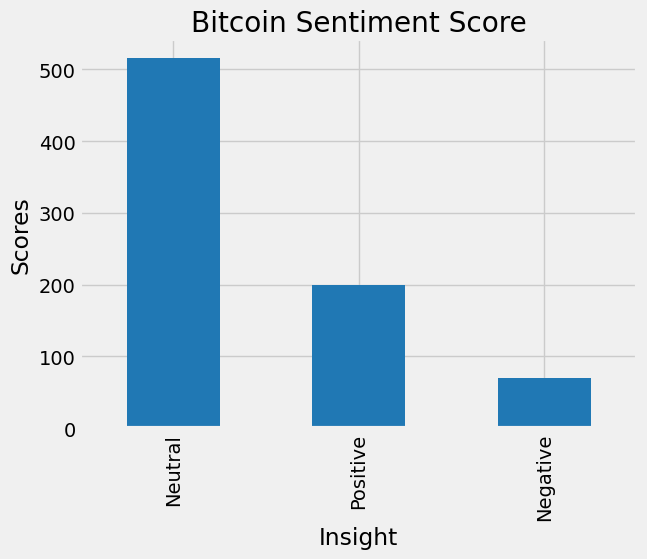

In [28]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

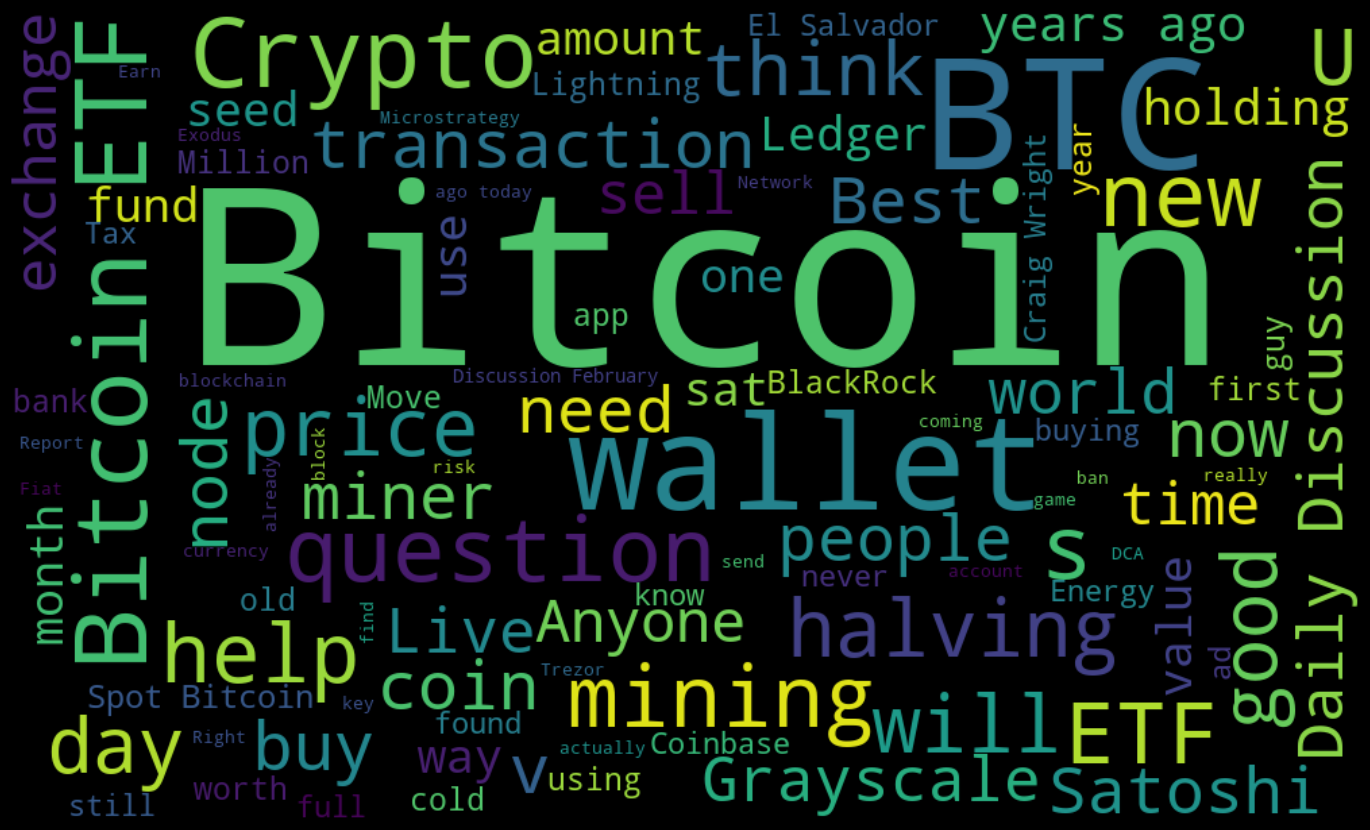

In [29]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");